**Pricing Transparency Risk Assessment: A Data-Driven Governance Analysis**

Objective

To evaluate whether pricing patterns demonstrate transparency, consistency, and logical structure using historical flight data.

Governance Focus

This assessment analyzes pricing behavior to determine whether patterns are predictable, explainable, and aligned with governance principles of fairness, consistency, and oversight.

**Governance Context**

Pricing transparency is essential for financial oversight and vendor governance.
Opaque or inconsistent pricing structures increase financial unpredictability and weaken cost monitoring controls.

This analysis tests:

Whether pricing increases logically as departure approaches.

Whether premium services (e.g., non-stop, business class) justify higher costs.

Whether volatility levels indicate inconsistent pricing behavior.

Whether pricing patterns align with transparent governance expectations.

In [1]:
import sys
print(sys.executable)

C:\Users\uzodi\anaconda3\envs\grc\python.exe


In [2]:
import pandas as pd
import numpy as np

In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv("airlines_flights_data.csv")

# Group by days_left and calculate average price
price_by_days = df.groupby("days_left")["price"].mean().reset_index()

price_by_days.head()

,days_left,price
0,1,21591.867151
1,2,30211.299801
2,3,28976.083569
3,4,25730.905653
4,5,26679.773368


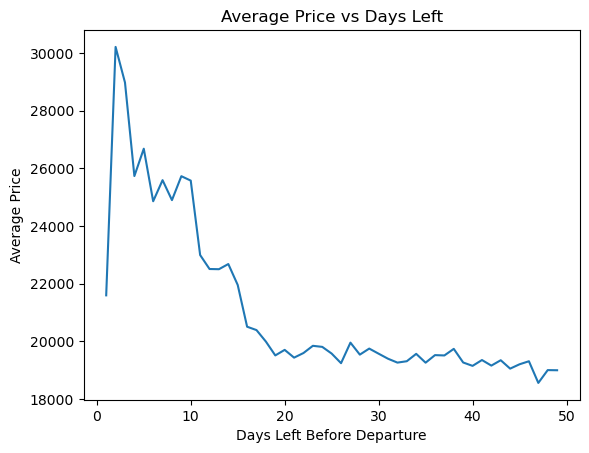

In [4]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(price_by_days["days_left"], price_by_days["price"])
plt.xlabel("Days Left Before Departure")
plt.ylabel("Average Price")
plt.title("Average Price vs Days Left")
plt.show()

While pricing demonstrates a general demand-aligned structure, volatility persists across all booking windows, with the highest unpredictability observed within 0–7 days. This indicates that pricing stability improves with earlier booking but does not eliminate variance entirely, suggesting moderate transparency risk.

In [5]:
# Create booking window categories

def booking_window(days):
    if days <= 7:
        return "0-7 Days"
    elif days <= 21:
        return "8-21 Days"
    else:
        return "22+ Days"

df["booking_window"] = df["days_left"].apply(booking_window)

# Calculate volatility (standard deviation) by booking window
volatility = df.groupby("booking_window")["price"].agg(["mean", "std", "count"]).reset_index()

volatility

,booking_window,mean,std,count
0,0-7 Days,26451.234827,23308.502665,32113
1,22+ Days,19386.316280,22683.030842,180084
2,8-21 Days,21937.109350,22119.981723,87956


While pricing demonstrates a general demand-aligned structure, volatility persists across all booking windows, with the highest unpredictability observed within 0–7 days. This indicates that pricing stability improves with earlier booking but does not eliminate variance entirely, suggesting moderate transparency risk.

In [6]:
class_analysis = df.groupby("class")["price"].agg(["mean", "std", "count"]).reset_index()

class_analysis

,class,mean,std,count
0,Business,52540.081124,12969.314606,93487
1,Economy,6572.342383,3743.519517,206666


Business class consistently commands a significantly higher premium compared to economy class, indicating clear price differentiation aligned with service level. However, the magnitude of the premium suggests the need for further evaluation of proportionality and volatility behavior across classes.

That’s balanced. Not accusatory. Analytical.

In [7]:
# Volatility comparison by class
class_volatility = df.groupby("class")["price"].std().reset_index()

class_volatility

,class,price
0,Business,12969.314606
1,Economy,3743.519517


In [8]:
class_analysis["cv"] = class_analysis["std"] / class_analysis["mean"]
class_analysis

,class,mean,std,count,cv
0,Business,52540.081124,12969.314606,93487,0.246846
1,Economy,6572.342383,3743.519517,206666,0.569587


Business pricing is expensive but relatively stable proportionally.

Economy pricing is cheaper but proportionally more unpredictable.

That suggests:

Pricing transparency risk is higher in economy class when evaluated relative to price level.

In [9]:
stops_analysis = df.groupby("stops")["price"].agg(["mean", "std", "count"]).reset_index()
stops_analysis

,stops,mean,std,count
0,one,22900.992482,23626.066584,250863
1,two_or_more,14113.450775,17664.332033,13286
2,zero,9375.938535,10623.008293,36004


Non-stop flights (zero stops) are the cheapest on average.

That is counterintuitive.

Normally, we expect:

Non-stop > One stop > Two+ stops

Because:

Faster

More convenient

Higher demand

Premium service value

But here, the data shows:

One stop is most expensive.
Non-stop is cheapest.

In [10]:
# Calculate price per hour
df["price_per_hour"] = df["price"] / df["duration"]

stops_duration_analysis = df.groupby("stops")["price_per_hour"].mean().reset_index()

stops_duration_analysis

,stops,price_per_hour
0,one,1940.006586
1,two_or_more,1107.152330
2,zero,4210.259297


Although non-stop flights appeared cheaper in aggregate, normalization by flight duration reveals that non-stop flights command the highest price per hour. This suggests pricing aligns with time-efficiency value rather than raw ticket cost, reducing concerns of structural inconsistency.

**Pricing Transparency Risk Rating**

After reviewing how prices change over time, how they differ by service level, and how much they fluctuate, the overall pricing transparency risk is rated as Moderate.

Prices generally follow logical patterns based on demand and service type. However, prices become more unstable close to departure, and economy class shows higher relative fluctuations. These areas should be monitored regularly, but there is no evidence of major structural pricing issues.